In [203]:
#Importing all the required libraries
import pandas as pd #It makes working with structured data (like CSV files or database tables) easier. You can filter, transform, and analyze data easily using pandas.
import numpy as np #mathematical library #It helps with working on large sets of numbers efficiently, performing mathematical operations, and handling multi-dimensional arrays (like tables of numbers). 
import sklearn # It provides machine learning tools and algorithms for tasks like classification, regression, clustering, and more. It helps you build and train machine learning models.
from pandas.core.dtypes.common import is_numeric_dtype #"from pandas.core.dtypes.common import is_numeric_dtype" imports the is_numeric_dtype function from the pandas.core.dtypes.common module. This function is used to check if a given pandas data type is numeric or not.
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt #It helps create visualizations such as line plots, scatter plots, and histograms. You can use it to represent your data visually.
import seaborn as sns #It builds on top of matplotlib and makes it simpler to create statistical visualizations with better aesthetics. It's useful for creating attractive plots like heatmaps, violin plots, and more.
import warnings as wr #Ignores the warnings
wr.filterwarnings('ignore') 

In [204]:
df=pd.read_csv("game data.csv")

In [205]:
df

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes
5,6,Sunny,Warm,Outdoor,No
6,7,Cloudy,Warm,Indoor,No
7,8,Sunny,Warm,Indoor,No


In [206]:
df.drop('Days', axis=1, inplace=True) # df will be automatically updated after dropping the Days column as it has inplace = True.

#df = df.drop('Days', axis=1, inplace=False) # after dropping the Days column, the updated result will be stored in df (as it has inplace = False).

In [207]:
df

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes
5,Sunny,Warm,Outdoor,No
6,Cloudy,Warm,Indoor,No
7,Sunny,Warm,Indoor,No


In [208]:
y=df['Wear Jacket?']

In [209]:
x=df.drop('Wear Jacket?', axis=1) # except wear jacket, all other columns are x.

In [210]:
x

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor
5,Sunny,Warm,Outdoor
6,Cloudy,Warm,Indoor
7,Sunny,Warm,Indoor


In [211]:
x.columns

Index(['Outlook', 'Temprature', 'Routine'], dtype='object')

In [212]:
for col in x.columns:
  if is_numeric_dtype(x[col]):
    continue
  else:
    x[col]=LabelEncoder().fit_transform(x[col])

#if numeric, then skip. If not numeric, then encoded with Label Encoder.

In [213]:
x

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1
5,1,1,1
6,0,1,0
7,1,1,0


In [214]:
x.columns

Index(['Outlook', 'Temprature', 'Routine'], dtype='object')


*   Outlook (sunny -> 1, cloudy -> 0)
*   Temperature (cold -> 0, warm -> 1)
*   Routine (indoor -> 0, outdoor -> 1) 







**Sunny, Cold, Indoor = ( ) ?         (1,0,0)**

In [215]:
clf = DecisionTreeClassifier()

In [216]:
clf.fit(x,y)

DecisionTreeClassifier()

**Prediction**

In [217]:
clf.predict([[1,0,0]]) #Sunny, Cold, Indoor = ( ) ? (1,0,0) #No

array(['No'], dtype=object)

In [218]:
clf.predict([[1,0,1]]) #Sunny, Cold, Outdoor = ( ) ? (1,0,1) #Yes

array(['Yes'], dtype=object)

**Tree Representation**

[Text(0.6666666666666666, 0.875, 'x[1] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.5, 0.625, 'x[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.3333333333333333, 0.375, 'x[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

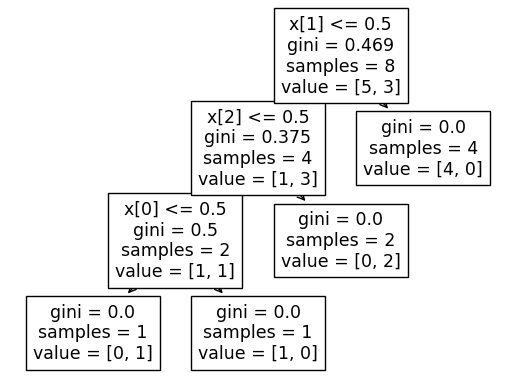

In [219]:
tree.plot_tree(clf)

[Text(0.6666666666666666, 0.875, 'x[1] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.5, 0.625, 'x[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.3333333333333333, 0.375, 'x[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

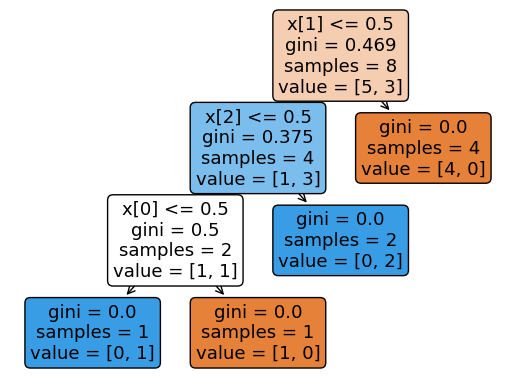

In [220]:
tree.plot_tree(clf, rounded=True, filled=True) # x[1] -> Temperature, x[0] -> Outlook, x[2] -> Routine.

[Text(0.6666666666666666, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.5, 0.625, 'Routine <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.3333333333333333, 0.375, 'Outlook <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

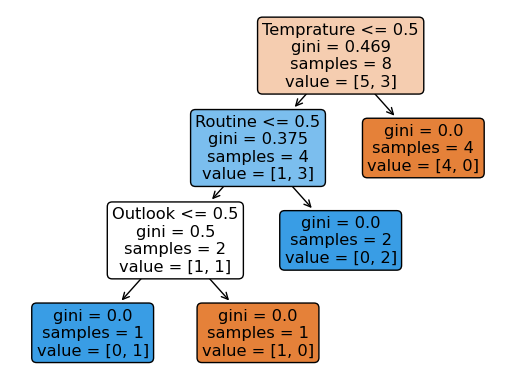

In [221]:
tree.plot_tree(clf, rounded=True, filled=True, feature_names=x.columns)

[Text(0.6666666666666666, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.5, 0.625, 'Routine <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.3333333333333333, 0.375, 'Outlook <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

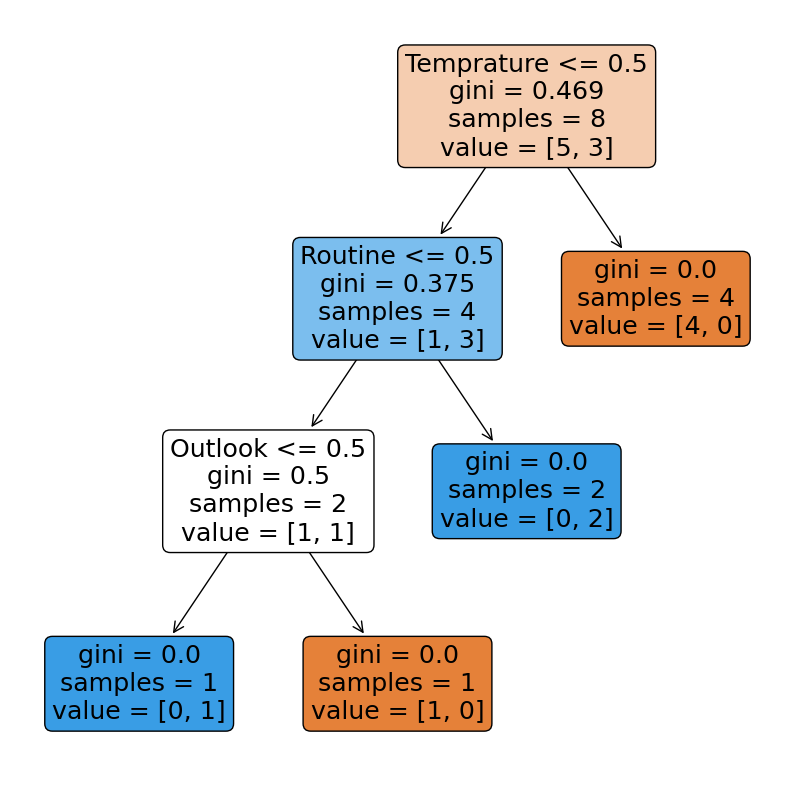

In [222]:
plt.figure(figsize=(10,10)) # For example, (6, 10) represents a figure size of 6 inches in width and 10 inches in height. 
tree.plot_tree(clf, rounded=True, filled=True, feature_names=x.columns)

**Text Representation**

In [223]:
text_rep=tree.export_text(clf)

In [224]:
text_rep

'|--- feature_1 <= 0.50\n|   |--- feature_2 <= 0.50\n|   |   |--- feature_0 <= 0.50\n|   |   |   |--- class: Yes\n|   |   |--- feature_0 >  0.50\n|   |   |   |--- class: No\n|   |--- feature_2 >  0.50\n|   |   |--- class: Yes\n|--- feature_1 >  0.50\n|   |--- class: No\n'

In [225]:
print(text_rep)

|--- feature_1 <= 0.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: Yes
|   |   |--- feature_0 >  0.50
|   |   |   |--- class: No
|   |--- feature_2 >  0.50
|   |   |--- class: Yes
|--- feature_1 >  0.50
|   |--- class: No



In [226]:
x_updated=x.columns.tolist() # Convert x.columns to a list of strings
text_rep=tree.export_text(clf, feature_names=x_updated) # Export the decision tree as text representation

In [227]:
print(text_rep)

|--- Temprature <= 0.50
|   |--- Routine <= 0.50
|   |   |--- Outlook <= 0.50
|   |   |   |--- class: Yes
|   |   |--- Outlook >  0.50
|   |   |   |--- class: No
|   |--- Routine >  0.50
|   |   |--- class: Yes
|--- Temprature >  0.50
|   |--- class: No

